<center>
<h1>Refreshing Your Linear Algebra Knowledge with NumPy, Part II
</h1>

<h2>Steve Lindblad<br>
</H2>

<H3>DataSciPy Meetup<br>
Veritas Technologies LLC<br>
Roseville, MN<br>
November 10, 2018<br>
 
</H3>
</center>

\[SL (11/10/2018): This is the notebook as produced live from my talk today. Note: "Part I" was my presentation of similar material at the 7/12/2018 PyMNtos meeting.
It consisted essentially of the same material below but ended just before the
"LU Decomposition" section.\]

# Example

System of 3 linear equations in 3 unknowns (variables):

\begin{eqnarray*}
2x + 2y + 4z &=& 0 \\
      y - 5z &=& 13 \\
     3y + 4z &=& 1 \\
\end{eqnarray*}

Goal is to find the values of $x$, $y$, and $z$ that make all three equations true simultaneously.

One way to solve is to manipulate the equations directly:

(1) Subtract 3 times the second equation from the third to eliminate $y$ and solve for $z$:
$$\begin{array}{rrrrr}
     3y &+& 4z &=& 1 \\
    -3y &+& 15z &=& -39 \\ 
     \hline{}
     & & 19z &=& -38 \\
     & & z &=& -2 \\
\end{array}$$

(2) Plug $z=-2$ back into the second equation to solve for $y$:
\begin{eqnarray*}
y - 5(-2) & = & 13 \\
y + 10 & = & 13 \\
y  & = & 3 
\end{eqnarray*}

(3) Plug $y=3$ and $z=-2$ into the first equation to solve for $x$:
\begin{eqnarray*}
2x + 2(3) + 4(-2) & = & 0 \\
      2x & = & 2 \\
     x & = & 1
\end{eqnarray*}



## Disadvantage

Above approach is much more difficult with larger systems of equations:

\begin{eqnarray*}
 2v + 7w -  x + 3y +  6z & = & 24 \\
 3v + 3w +  x -  y +  5z & = & {-1} \\
  v -  w - 2x - 3y -  8z & = & {-16} \\
 4v + 5w - 3x + 7y + 10z & = & 52 \\
-5v + 3w - 9x - 9y +   z & = & 25
\end{eqnarray*}



## Power of matrix notation

$$\begin{array}{ccccc}
\left[ 
\begin{array}{rrrrr}
 2 &  7 & -1 &  3 &  6 \\
 3 &  3 &  1 & -1 &  5 \\
 1 & -1 & -2 & -3 & -8 \\
 4 &  5 & -3 &  7 & 10 \\
-5 &  3 & -9 & -9 &  1 \\
\end{array}\right]
& \times &
\left[\begin{array}{c}
v \\
w \\
x \\
y \\
z \\
\end{array}\right]
& = &
\left[\begin{array}{r}
 24\\
 -1\\
-16\\
 52\\
 25\\
\end{array}
\right]\\
A & \times & t & = & d \\
\end{array}
$$


# Using Matrix Techniques to Solve a Linear System

First, let's first return to the original system:

\begin{eqnarray*}
2x + 2y + 4z & = & 0 \\
      y - 5z & = & 13 \\
     3y + 4z & = & 1 
\end{eqnarray*}

or

$$\begin{array}{cccc}
\left[ 
\begin{array}{rrr}
 2 & 2 &  4 \\
 0 & 1 & -5 \\
 0 & 3 &  4 \\
\end{array}\right]
&
\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
& = &
\left[\begin{array}{r}
 0\\
13\\
 1\\
\end{array}
\right] \\
A & t &  & d \\
\end{array}$$




## Step 0

Form the __augmented matrix__:

$$\left[ 
\begin{array}{rrr:r}
 2 & 2 &  4 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1\\
\end{array}\right]
$$


### Enter data into Python

In [2]:
import numpy as np

In [3]:
A = np.matrix("2 2 4; 0 1 -5; 0 3 4")

In [4]:
d = np.mat("0; 13; 1")

In [5]:
A

matrix([[ 2,  2,  4],
        [ 0,  1, -5],
        [ 0,  3,  4]])

In [6]:
d

matrix([[ 0],
        [13],
        [ 1]])

In [7]:
M = np.hstack( (A,d) )

In [8]:
M

matrix([[ 2,  2,  4,  0],
        [ 0,  1, -5, 13],
        [ 0,  3,  4,  1]])

### Goal

Given the augmented matrix
$$\left[ 
\begin{array}{rrr:r}
 2 & 2 &  4 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1\\
\end{array}\right]
$$

we want to perform __elementary row operations__ (Gaussian elimination) to transform the above into an equivalent matrix of the the following form, from which the solution can be read:

$$\left[ 
\begin{array}{rrr:r}
 1 & 0 & 0 & ?\\
 0 & 1 & 0 & ?\\
 0 & 0 & 1 & ?\\
\end{array}\right]
$$
or
$$\left[ 
\begin{array}{rrr}
 1 & 0 & 0 \\
 0 & 1 & 0 \\
 0 & 0 & 1 \\
\end{array}\right]
\;
\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 ?\\
 ?\\
 ?\\
\end{array}
\right]
$$
or
$$\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 ?\\
 ?\\
 ?\\
\end{array}
\right]
$$


### Elementary row operations (Gaussian elimination)

* __multiply__ a row by a non-zero scalar
* __add to__ one row a scalar multiple of another row
* __interchange__ of two rows



## Step 1

First step is multiply the first row by $\frac{1}{2}$ to get a $1$ in the first column:

$$
\left[ 
\begin{array}{rrrr}
 2 & 2 &  4 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1
\end{array}\right] \;\longrightarrow\;
\left[ 
\begin{array}{rrrr}
 1 & 1 &  2 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1
\end{array}\right]
$$




### Step 1 as a matrix multiplication

The idea of "multiply the first row by ½" can be expressed as a matrix multiplication:
 
$$\left[ 
\begin{array}{rrr}
 \frac{1}{2} & 0 &  0\\
 0 & 1 & 0 \\
 0 & 0 & 1 
\end{array}\right]
\left[ 
\begin{array}{rrrr}
 2 & 2 &  4 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1
\end{array}\right]=\left[ 
\begin{array}{rrrr}
 1 & 1 &  2 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1
\end{array}\right]
$$

Matrix on the left, an identity matrix with a small adjustment, is a __elementary matrix__.


### Create a Python function to return the elementary matrix:

In [9]:
def scalerow(r, α, n=3):
    """Elementary matrix to multiply row r by the scalar α, 
when multiplied on the left of a target matrix of n rows."""
    E = np.asmatrix(np.eye(n))
    E[r,r] = α
    return E

In [12]:
E1 = scalerow(0, .5); E1

matrix([[0.5, 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ]])

In [13]:
E1*M

matrix([[ 1.,  1.,  2.,  0.],
        [ 0.,  1., -5., 13.],
        [ 0.,  3.,  4.,  1.]])

\[SL (11/10/2018): The following was in response to a question during the talk.
This confirms that np.matrix() can be used in place of np.asmatrix() to convert
a data array to a matrix.\]

In [11]:
np.matrix(np.eye(3))

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

## Step 2
Next, subtract 3 times row 1 from row 2.

$$\left[ 
\begin{array}{rrr}
 1 & ? & ?\\
 ? & 1 & ? \\
 ? & ? & 1 \\
\end{array}\right]
\left[ 
\begin{array}{rrrr}
 1 & 1 &  2 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1\\
\end{array}\right]=\left[ 
\begin{array}{rrrr}
 1 & 1 &  2 & 0\\
 0 & 1 & -5 & 13\\
 0 & 0 & 19 & -38\\
\end{array}\right]
$$


In [14]:
def addtorow(r, α, j, n=3):
    """Elementary matrix to add α times row j to row r,
when multiplied on the left of a target matrix of n rows."""
    E = np.asmatrix(np.eye(n))
    E[r,j] = α
    return E

In [15]:
E2 = addtorow(2, -3, 1); E2

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -3.,  1.]])

In [16]:
E2*E1*M

matrix([[  1.,   1.,   2.,   0.],
        [  0.,   1.,  -5.,  13.],
        [  0.,   0.,  19., -38.]])

## Remaining row operation steps

In [17]:
E3 = addtorow(0, -1, 1); E3*E2*E1*M

matrix([[  1.,   0.,   7., -13.],
        [  0.,   1.,  -5.,  13.],
        [  0.,   0.,  19., -38.]])

In [18]:
E4 = scalerow(2, 1/19); E4*E3*E2*E1*M

matrix([[  1.,   0.,   7., -13.],
        [  0.,   1.,  -5.,  13.],
        [  0.,   0.,   1.,  -2.]])

In [19]:
E5 = addtorow(1, 5, 2); E5*E4*E3*E2*E1*M

matrix([[ 1.00000000e+00,  0.00000000e+00,  7.00000000e+00,
         -1.30000000e+01],
        [ 0.00000000e+00,  1.00000000e+00, -2.22044605e-16,
          3.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         -2.00000000e+00]])

In [20]:
E6 = addtorow(0, -7, 2); E6*E5*E4*E3*E2*E1*M

matrix([[ 1.00000000e+00, -5.55111512e-17,  4.44089210e-16,
          1.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00, -2.22044605e-16,
          3.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         -2.00000000e+00]])

In [21]:
np.round( E6*E5*E4*E3*E2*E1*M  ,9)

array([[ 1., -0.,  0.,  1.],
       [ 0.,  1., -0.,  3.],
       [ 0.,  0.,  1., -2.]])

## Summary

We have transformed the original augmented matrix

$$\left[ 
\begin{array}{rrr:r}
 2 & 2 &  4 & 0\\
 0 & 1 & -5 & 13\\
 0 & 3 &  4 & 1\\
\end{array}\right]
$$

to the equivalent augmented matrix

$$\left[ 
\begin{array}{rrr:r}
 1 & 0 & 0 & 1\\
 0 & 1 & 0 & 3\\
 0 & 0 & 1 & -2\\
\end{array}\right].
$$

In other words,

$$\left[ 
\begin{array}{rrr}
 1 & 0 & 0 \\
 0 & 1 & 0 \\
 0 & 0 & 1 \\
\end{array}\right]
\;
\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 1\\
 3\\
 -2\\
\end{array}
\right]
$$

Or

$$\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 1\\
 3\\
 -2\\
\end{array}
\right]
$$


Thus, $x=1$, $y=3$, and $z=-2$ is the solution to the original system of equations.

The point $(1,3,-2)$ in $xyz$-space is the intersection of the planes given by the three equations.

## Revisiting the elementary matrices

In [22]:
np.round( (E6*E5*E4*E3*E2*E1) * A ,9)

array([[ 1., -0.,  0.],
       [ 0.,  1., -0.],
       [ 0.,  0.,  1.]])

In [23]:
A

matrix([[ 2,  2,  4],
        [ 0,  1, -5],
        [ 0,  3,  4]])

In [24]:
E6*E5*E4*E3*E2*E1  

matrix([[ 0.5       ,  0.10526316, -0.36842105],
        [ 0.        ,  0.21052632,  0.26315789],
        [ 0.        , -0.15789474,  0.05263158]])

In [25]:
A.I

matrix([[ 0.5       ,  0.10526316, -0.36842105],
        [ 0.        ,  0.21052632,  0.26315789],
        [-0.        , -0.15789474,  0.05263158]])

## Answer (version 2)

In [26]:
(E6*E5*E4*E3*E2*E1) * d

matrix([[ 1.],
        [ 3.],
        [-2.]])

In [27]:
A.I*d

matrix([[ 1.],
        [ 3.],
        [-2.]])

# General Solution

The original matrix equation:

$$\begin{array}{cccc}
\left[ 
\begin{array}{rrr}
 2 & 2 &  4 \\
 0 & 1 & -5 \\
 0 & 3 &  4 \\
\end{array}\right]
&
\left[\begin{array}{c}
x \\
y \\
z \\
\end{array}\right]
& = &
\left[\begin{array}{r}
 0\\
13\\
 1\\
\end{array}
\right] \\
A & t &  & d \\
\end{array}$$


The general solution to such a matrix equation is

\begin{eqnarray*}
At & = & d \\
A^{-1}At & = & A^{-1}d \\
I\;t & = & A^{-1}d \\
t &=& A^{-1}d 
\end{eqnarray*}


# Example 2

$$\left[ 
\begin{array}{rrrrr}
 2 &  7 & -1 &  3 &  6 \\
 3 &  3 &  1 & -1 &  5 \\
 1 & -1 & -2 & -3 & -8 \\
 4 &  5 & -3 &  7 & 10 \\
-5 &  3 & -9 & -9 &  1 \\
\end{array}\right]
\left[\begin{array}{c}
v \\
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 24\\
 -1\\
-16\\
 52\\
 25\\
\end{array}
\right]
$$


In [28]:
A2 = np.mat("2 7 -1 3 6; 3 3 1 -1 5; 1 -1 -2 -3 -8; 4 5 -3 7 10; -5 3 -9 -9 1"); A2

matrix([[ 2,  7, -1,  3,  6],
        [ 3,  3,  1, -1,  5],
        [ 1, -1, -2, -3, -8],
        [ 4,  5, -3,  7, 10],
        [-5,  3, -9, -9,  1]])

In [29]:
d2 = np.mat("24 -1 -16 52 25").T; d2   

matrix([[ 24],
        [ -1],
        [-16],
        [ 52],
        [ 25]])

In [30]:
t2 = A2.I * d2

In [31]:
t2

matrix([[-1.00000000e+00],
        [-1.77635684e-15],
        [-5.00000000e+00],
        [ 3.00000000e+00],
        [ 2.00000000e+00]])

In [32]:
np.round( t2 ,9)

array([[-1.],
       [-0.],
       [-5.],
       [ 3.],
       [ 2.]])

## Check:

In [33]:
A2*t2

matrix([[ 24.],
        [ -1.],
        [-16.],
        [ 52.],
        [ 25.]])

In [34]:
A2*t2-d2

matrix([[-2.13162821e-14],
        [-8.88178420e-15],
        [ 7.10542736e-15],
        [-2.13162821e-14],
        [-7.10542736e-15]])

In [35]:
np.round( A2*t2-d2 ,9)

array([[-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.]])

# Example 3

$$\left[ 
\begin{array}{rrrrr}
 1 &  0 & -5 &  6 \\
 1 &  1 &  1 &  1 \\
 3 &  0 & -5 &  8 \\
 1 & -1 & -1 &  1 \\
\end{array}\right]
\left[\begin{array}{c}
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
-1\\
 7\\
 7\\
 1\\
\end{array}
\right]
$$



In [36]:
A3 = np.mat("1 0 -5 6; 1 1 1 1; 3 0 -5 8; 1 -1 -1 1")

In [37]:
A3

matrix([[ 1,  0, -5,  6],
        [ 1,  1,  1,  1],
        [ 3,  0, -5,  8],
        [ 1, -1, -1,  1]])

In [38]:
d3 = np.mat([-1, 7, 7, 1]).T; d3

matrix([[-1],
        [ 7],
        [ 7],
        [ 1]])

In [39]:
t3 = A3.I*d3; t3

matrix([[-32.],
        [  0.],
        [ 16.],
        [ 16.]])

In [40]:
A3*t3

matrix([[-16.],
        [  0.],
        [-48.],
        [-32.]])

In [41]:
A3.I

matrix([[-1.35107989e+16, -1.35107989e+16,  1.35107989e+16,
         -1.35107989e+16],
        [-1.35107989e+16, -1.35107989e+16,  1.35107989e+16,
         -1.35107989e+16],
        [ 1.35107989e+16,  1.35107989e+16, -1.35107989e+16,
          1.35107989e+16],
        [ 1.35107989e+16,  1.35107989e+16, -1.35107989e+16,
          1.35107989e+16]])

# Singular (Noninvertible) Matrices

### Test 1: Determinants

A square matrix is invertible (nonsingular) if and only if its **determinant** is nonzero.

In [42]:
import numpy.linalg

In [43]:
np.linalg.det(A3)

7.401486830834343e-16

In [44]:
np.linalg.det(A2)

17052.000000000007

### Test 2: Matrix rank

A square matrix is invertible (nonsingular) if and only if it is of **full rank**.

In [45]:
np.linalg.matrix_rank(A3) 

3

In [46]:
A3.shape

(4, 4)

In [47]:
np.linalg.matrix_rank(A2)

5

In [48]:
A2.shape

(5, 5)

In [49]:
np.rank(A3)

/home/sl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


2

In [50]:
A3.shape

(4, 4)

# LU Decomposition

Getting back to Example 3, how do we deal with fact that $A$ is singular?

In [51]:
import scipy.linalg

In [52]:
P, L, U = scipy.linalg.lu(A3)

In [53]:
P

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [54]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.33333333,  1.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        ,  0.        ],
       [ 0.33333333, -1.        , -1.        ,  1.        ]])

In [55]:
np.round( U ,9)

array([[ 3.        ,  0.        , -5.        ,  8.        ],
       [ 0.        ,  1.        ,  2.66666667, -1.66666667],
       [ 0.        ,  0.        , -3.33333333,  3.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [56]:
np.asmatrix(P)*L*U

matrix([[ 1.,  0., -5.,  6.],
        [ 1.,  1.,  1.,  1.],
        [ 3.,  0., -5.,  8.],
        [ 1., -1., -1.,  1.]])

In [57]:
P

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [58]:
np.linalg.det(P)

-1.0

In [59]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.33333333,  1.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        ,  0.        ],
       [ 0.33333333, -1.        , -1.        ,  1.        ]])

In [60]:
np.linalg.det(L)

1.0

In [61]:
np.round(U ,9)

array([[ 3.        ,  0.        , -5.        ,  8.        ],
       [ 0.        ,  1.        ,  2.66666667, -1.66666667],
       [ 0.        ,  0.        , -3.33333333,  3.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [62]:
np.linalg.det(U)

-7.401486830834343e-16

In [63]:
np.linalg.matrix_rank(U)

3

In [64]:
PL = np.asmatrix(P)*L

In [65]:
PL

matrix([[ 0.33333333,  0.        ,  1.        ,  0.        ],
        [ 0.33333333,  1.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.33333333, -1.        , -1.        ,  1.        ]])

In [66]:
PL*U

matrix([[ 1.,  0., -5.,  6.],
        [ 1.,  1.,  1.,  1.],
        [ 3.,  0., -5.,  8.],
        [ 1., -1., -1.,  1.]])

In [67]:
np.linalg.det(PL)

-1.0

In [68]:
PL.I

matrix([[-0.        ,  0.        ,  1.        , -0.        ],
        [-0.        ,  1.        , -0.33333333, -0.        ],
        [ 1.        ,  0.        , -0.33333333, -0.        ],
        [ 1.        ,  1.        , -1.        ,  1.        ]])

This suggests we can do the following:

\begin{eqnarray*}
At &=& d\\
PLUt &=& d\\
Ut &=& (PL)^{-1}d
\end{eqnarray*}



In [69]:
np.round( U ,9)

array([[ 3.        ,  0.        , -5.        ,  8.        ],
       [ 0.        ,  1.        ,  2.66666667, -1.66666667],
       [ 0.        ,  0.        , -3.33333333,  3.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [70]:
PL.I*d3

matrix([[ 7.        ],
        [ 4.66666667],
        [-3.33333333],
        [ 0.        ]])

In [71]:
np.round( 3*U ,9)

array([[  9.,   0., -15.,  24.],
       [  0.,   3.,   8.,  -5.],
       [  0.,   0., -10.,  10.],
       [  0.,   0.,   0.,   0.]])

In [72]:
3*PL.I*d3

matrix([[ 21.],
        [ 14.],
        [-10.],
        [  0.]])

## Recap

\begin{eqnarray*}
At &=& d\\
PLUt &=& d\\
Ut &=& (PL)^{-1}d
\end{eqnarray*}

And in this case (optionally), we multiplied both sides by $3$ to make the numbers nicer:

\begin{eqnarray*}
3Ut &=& 3(PL)^{-1}d
\end{eqnarray*}

Or:
    
$$\left[ 
\begin{array}{rrrrr}
 9 &  0 & -15 & 24 \\
 0 &  3 &   8 & -5 \\
 0 &  0 & -10 & 10 \\
 0 &  0 &   0 &  0 \\
\end{array}\right]
\left[\begin{array}{c}
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 21\\
 14\\
-10\\
  0\\
\end{array}
\right]
$$

    

## Solution to Example 3
Let $z$ be anything and backsolve (easy because $U$ is upper triangular):

\begin{eqnarray*}
{-10y} + 10z &=& {-10} \\
{-y} + z &=& {-1} \\
y &=& z+1 \\
\\
\end{eqnarray*}

\begin{eqnarray*}
3x + 8y - 5z &=& 14 \\
3x + 8(z+1) - 5z &=& 14 \\
3x &=& 6-3z \\
x &=& 2-z \\
\\
\end{eqnarray*} 

\begin{eqnarray*}
9w - 15y +24z &=& 21 \\
9w - 15(z+1) +24z &=& 21 \\
9w -15z - 15 + 24z &=& 21 \\
9w &=& 36 - 9z \\
w &=& 4-z \\
\end{eqnarray*}


Thus, for any number $z$, 

$$t = \left[\begin{array}{c}
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{c}
 4-z\\
 2-z\\
 z+1\\
 z\\
\end{array}
\right]
$$

is a solution.

In [73]:
def t3(z): 
    return np.matrix([4-z, 2-z, z+1, z]).T

In [74]:
t3(1)

matrix([[3],
        [1],
        [2],
        [1]])

In [75]:
t3(10.17)

matrix([[-6.17],
        [-8.17],
        [11.17],
        [10.17]])

In [76]:
A3*t3(10.17)

matrix([[-1.],
        [ 7.],
        [ 7.],
        [ 1.]])

In [77]:
A3*t3(0)

matrix([[-1],
        [ 7],
        [ 7],
        [ 1]])

# Underdetermined Systems of Equations

The last equation in the system

$$\left[ 
\begin{array}{rrrrr}
 9 &  0 & -15 & 24 \\
 0 &  3 &   8 & -5 \\
 0 &  0 & -10 & 10 \\
 0 &  0 &   0 &  0 \\
\end{array}\right]
\left[\begin{array}{c}
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 21\\
 14\\
-10\\
  0\\
\end{array}
\right]
$$

can be eliminated since it doesn't convey any information (it is always true):

$$\left[ 
\begin{array}{rrrrr}
 9 &  0 & -15 & 24 \\
 0 &  3 &   8 & -5 \\
 0 &  0 & -10 & 10 \\
\end{array}\right]
\left[\begin{array}{c}
w \\
x \\
y \\
z \\
\end{array}\right]
\;=\;
\left[\begin{array}{r}
 21\\
 14\\
-10\\
\end{array}
\right]
$$

This (and the original system) is an __underdetermined__ system of linear equations. It has infinitely many solutions because there are more variables (degrees of freedom) than equations (constraints).

# Inconsistent Systems of Equations

Conversely, a system of linear equations with no solutions is __inconsistent__ or __overdetermined__.


## Example 4
For example, here is an overdetermined system of three equations in two unknowns:

\begin{eqnarray*}
3x - 4y &=& 7 \\
2x + 6y &=& 5 \\
5x + 2y  &=& 9 
\end{eqnarray*}



How do you "solve" such a system of equations?


In matrix notation,

$$\begin{array}{ccccc}
\left[ 
\begin{array}{rr}
 3 &  -4  \\
 2 &   6  \\
 5 &   2  \\
\end{array}\right]
& 
\left[\begin{array}{c}
x \\
y \\
\end{array}\right]
& = &
\left[\begin{array}{r}
 7\\
 5\\
 9\\
\end{array}
\right]\\
\\
{A} & {t} &  & {d}\\
{\tiny 3\times 2} & {\tiny 2 \times 1} &  & {\tiny 3 \times 1}\\
\end{array}
$$



### Geometric Point of View

Goal: Find the projection $p =A\bar t$ of $d$ onto the column space
of $A$. It will follow that $t=\bar t$
minimizes the distance $\| A t - d \|$ and is the **least squares** solution
to the linear system $At=d$. 

<img src="projillus2-shade-150.png">

For all possible values of $s$, the vector $As$ must be perpendicular (orthogonal)
to the vector $A\bar t-d$:

$$\begin{array}{c}
(As) \cdot (A\bar t-d) = 0\\
(As)^T(A\bar t-d) =0\\
s^T A^T(A\bar t-d)=0\\
s^T (A^TA\bar t-A^Td)=0\\
\end{array}$$


This can only be true for *all* values of $s$ if $A^TA\bar t-A^Td=0$, or $$A^TA\bar t=A^Td.$$

If $A^TA$ is invertible, then the unique solution is

$$\bar t=(A^TA)^{-1}A^Td.$$

In [78]:
A4 = np.matrix("3 -4; 2 6; 5 2"); A4

matrix([[ 3, -4],
        [ 2,  6],
        [ 5,  2]])

In [79]:
d4 = np.matrix("7; 5; 9"); d4

matrix([[7],
        [5],
        [9]])

In [80]:
A4.T * A4

matrix([[38, 10],
        [10, 56]])

Is $A_4^TA_4$ is invertible? Check the determinant:

In [81]:
38*56 - 10*10

2028

In [82]:
np.linalg.det(A4.T*A4)

2028.000000000001

In [83]:
(A4.T*A4).I * A4.T * d4

matrix([[2.00000000e+00],
        [1.11022302e-16]])

#### Summary of Solution to Example 4

Thus, the least squares solution is $$\bar t=\left[ \begin{array}{c} 2 \\ 0 \\ \end{array}\right].$$

The projection of $d$ onto the column space of $A$ (the closest we could get) is

$$p = A\bar t=
\left[ 
\begin{array}{rr}
 3 &  -4  \\
 2 &   6  \\
 5 &   2  \\
\end{array}\right]
\left[\begin{array}{c}
2 \\
0 \\
\end{array}\right]
= 
\left[\begin{array}{c}
 6\\
 4\\
 10\\
\end{array}
\right]
\approx 
\left[\begin{array}{c}
 7\\
 5\\
 9\\
\end{array}
\right] =d.
$$



#### Another geometric look:

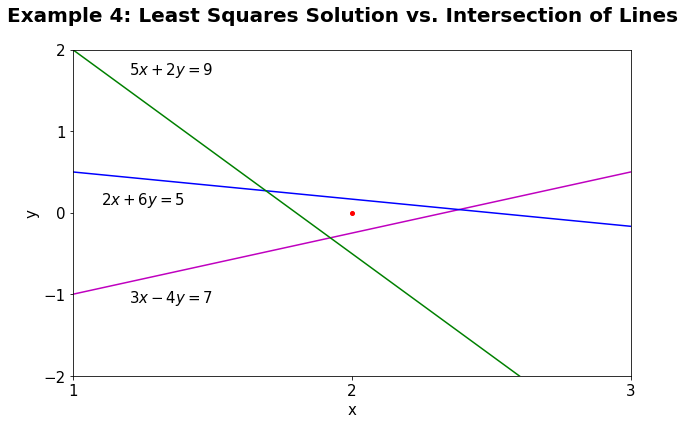

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
plt.suptitle('Example 4: Least Squares Solution vs. Intersection of Lines', fontsize=20, fontweight='bold')
plt.xlabel('x')
plt.xticks(np.arange(1, 4, 1))
plt.xlim(1,3)
plt.yticks([-2, -1, 0, 1, 2])
plt.ylabel('y')
plt.ylim(-2,2)
x = np.arange(1, 3.1, 0.1)
plt.plot(x, 3/4*x-7/4, 'm-', x, -1/3*x+5/6, 'b-', x, -5/2*x+9/2, 'g-')
plt.plot(2, 0, marker='.', markersize=8, color='red')
plt.text(1.2, -1.1, r'$3x-4y=7$', color='k')
plt.text(1.1,  0.1, r'$2x+6y=5$', color='k')
plt.text(1.2,  1.7, r'$5x+2y=9$', color='k')
plt.show()

In general:

# Least Squares Solution to a System of Equations 

$$\begin{array}{cccc}
{\large A} & {\large t} & {\large =} &   {\large d}\\
{\scriptsize n\times k} & {\scriptsize k \times 1} &  & {\scriptsize n \times 1}\\
\end{array}
$$

The __least squares__ solution $\bar t$ to a system $At = d$ of $n$ linear equations in $k$ unknowns 
satisfies the __normal equations__:

$$A^TA\bar t = A^Td.$$

If the columns of $A$ are linearly independent, then $A^TA$ is invertible and the unique least squares solution is 

$$\bar t = (A^TA)^{-1}A^Td .$$



## Example 5

A system of five linear equations in one unknown:

\begin{eqnarray*}
x &=& 37 \\
x &=& 22 \\
x &=& 70 \\
x &=& 16 \\
x &=& 84 
\end{eqnarray*}


In matrix notation,

$$\begin{array}{ccccc}
\left[ 
\begin{array}{r}
 1   \\
 1   \\
 1   \\
 1   \\
 1   \\
\end{array}\right]
& 
\left[\begin{array}{c}
x \\
\end{array}\right]
& = &
\left[\begin{array}{r}
 37\\
 22\\
 70\\
 16\\
 84\\
\end{array}
\right]\\
\\
{A} & {t} &  & {d}\\
{\tiny 5\times 1} & {\tiny 1 \times 1} &  & {\tiny 5 \times 1}\\
\end{array}
$$


In [86]:
A5 = np.matrix("1; 1; 1; 1; 1")

In [87]:
d5 = np.matrix("37; 22; 70; 16; 84")

In [88]:
A5.T*A5

matrix([[5]])

In [89]:
A5.T*d5

matrix([[229]])

In [90]:
(A5.T*A5).I * A5.T * d5

matrix([[45.8]])

### Question

If you replace the equation $x=70$ with the equivalent equation $2x=140$, does the answer change?

In [91]:
A52 = np.matrix("1; 1; 2; 1; 1"); A52

matrix([[1],
        [1],
        [2],
        [1],
        [1]])

In [92]:
d52 = np.matrix("37; 22; 140; 16; 84"); d52

matrix([[ 37],
        [ 22],
        [140],
        [ 16],
        [ 84]])

In [93]:
(A52.T*A52).I * A52.T * d52

matrix([[54.875]])

# Linear Regression

Problem: Given $n$ data points $(x_1, y_1), ..., (x_n, y_n)$, find the line $y=mx+b$ that best fits the data.

$x$ is the **independent variable** and $y$ is the **dependent variable**.


Here, $b$ and $m$ are the unknowns, and the $x_i$ and $y_i$ are known data points.  Our goal is to find the best solution to the following overdetermined system of $n$ linear equations in two unknowns ($b$ and $m$):

$$\begin{array}{c}
b+x_1m = y_1 \\
\vdots \\
b+x_nm = y_n\\
\end{array}
$$

Or, in matrix form,

$$\begin{array}{ccccc}
\left[ 
\begin{array}{cc}
 1 &  x_1  \\
 \vdots &   \vdots  \\
 1 &  x_n  \\
\end{array}\right]
& 
\left[\begin{array}{c}
b \\
m \\
\end{array}\right]
& = &
\left[\begin{array}{c}
 y_1\\
 \vdots \\
 y_n\\
\end{array}
\right]\\
\\
{A} & {t} &  & {Y}\\
{\tiny n\times 2} & {\tiny 2 \times 1} &  & {\tiny n \times 1}\\
\end{array}
$$




The least squares best fit values of $b$ and $m$ are 


$$\left[\begin{array}{c}
b \\
m \\
\end{array}\right]
= \bar t = (A^TA)^{-1}A^TY.$$


We know $A^TA$ will be invertible if the columns of $A$ are linearly independent. 

A set of columns (vectors) is **linearly independent** if and only if there is no one column that can be expressed as a linear combination (sum of scalar multiples) of the other columns.

Intuitively, what must be true of the $x_i$ for this to be true?

The columns of $A$ are **not** linearly independent if

$$
\left[ 
\begin{array}{c}
 x_1  \\
 \vdots  \\
 x_n  \\
\end{array}\right]
=
\beta
\left[ 
\begin{array}{c}
 1  \\
 \vdots  \\
 1  \\
\end{array}\right]
=
\left[ 
\begin{array}{c}
 \beta  \\
 \vdots  \\
 \beta  \\
\end{array}\right].
$$

That is, the $x_i$'s are all equal. It is not surprising that linear regression would not work if all of the values of the independent variable $x$ in the data were the same value. Otherwise, linear regression works.

## Example 6

In [94]:
from sklearn import datasets

In [95]:
boston = datasets.load_boston()

In [96]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [97]:
type(boston.data)

numpy.ndarray

In [98]:
boston.data.shape

(506, 13)

In [99]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [100]:
boston.feature_names[5]

'RM'

In [101]:
Xrm = np.asmatrix(boston.data[:,5]).T; Xrm[0:10]

matrix([[6.575],
        [6.421],
        [7.185],
        [6.998],
        [7.147],
        [6.43 ],
        [6.012],
        [6.172],
        [5.631],
        [6.004]])

In [102]:
Xrm.shape

(506, 1)

In [103]:
A6 = np.hstack( (np.matrix(np.ones(506)).T, Xrm) ); A6

matrix([[1.   , 6.575],
        [1.   , 6.421],
        [1.   , 7.185],
        ...,
        [1.   , 6.976],
        [1.   , 6.794],
        [1.   , 6.03 ]])

In [104]:
Y = np.asmatrix(boston.target).T; Y[0:10]

matrix([[24. ],
        [21.6],
        [34.7],
        [33.4],
        [36.2],
        [28.7],
        [22.9],
        [27.1],
        [16.5],
        [18.9]])

In [105]:
(A6.T*A6).I * A6.T * Y

matrix([[-34.67062078],
        [  9.10210898]])

In [106]:
scipy.stats.linregress(boston.data[:,5], boston.target)

LinregressResult(slope=9.102108981180306, intercept=-34.67062077643854, rvalue=0.695359947071539, pvalue=2.487228871008377e-74, stderr=0.41902656012134054)

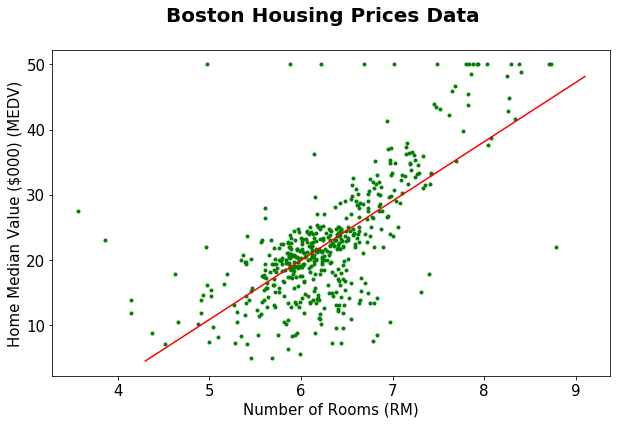

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
plt.suptitle('Boston Housing Prices Data', fontsize=20, fontweight='bold')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel("Home Median Value ($000) (MEDV)")
plt.plot(Xrm, Y, 'g.')
x = np.array([4.3, 9.1])
plt.plot(x, 9.1021*x - 34.6706, 'r-')
plt.show()

\[SL (11/10/2018): It was pointed out to me after the talk that the median house price is actually in multiples of \\$10,000,
not $1,000 as indicated in the DESCR text.\]

## Example 7—Multiple Regression

Let's add CRIM (crime rate) as a second independent variable.

In [108]:
boston.feature_names[0]

'CRIM'

In [109]:
Xcrim = np.asmatrix(boston.data[:,0]).T; Xcrim[0:10]

matrix([[0.00632],
        [0.02731],
        [0.02729],
        [0.03237],
        [0.06905],
        [0.02985],
        [0.08829],
        [0.14455],
        [0.21124],
        [0.17004]])

In [110]:
A7 = np.hstack( (A6,Xcrim) ); A7

matrix([[1.0000e+00, 6.5750e+00, 6.3200e-03],
        [1.0000e+00, 6.4210e+00, 2.7310e-02],
        [1.0000e+00, 7.1850e+00, 2.7290e-02],
        ...,
        [1.0000e+00, 6.9760e+00, 6.0760e-02],
        [1.0000e+00, 6.7940e+00, 1.0959e-01],
        [1.0000e+00, 6.0300e+00, 4.7410e-02]])

In [111]:
A7.shape

(506, 3)

In [112]:
np.linalg.matrix_rank(A7)

3

In [113]:
np.linalg.det(A7.T*A7)

4480321370.151303

In [114]:
(A7.T*A7).I * A7.T * Y

matrix([[-29.30168135],
        [  8.3975317 ],
        [ -0.2618229 ]])

In [115]:
from sklearn import linear_model

In [116]:
XX = np.hstack( (Xrm,Xcrim) ); XX

matrix([[6.5750e+00, 6.3200e-03],
        [6.4210e+00, 2.7310e-02],
        [7.1850e+00, 2.7290e-02],
        ...,
        [6.9760e+00, 6.0760e-02],
        [6.7940e+00, 1.0959e-01],
        [6.0300e+00, 4.7410e-02]])

In [117]:
XX.shape

(506, 2)

In [118]:
regr = linear_model.LinearRegression()

In [119]:
regr.fit(XX, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
regr.intercept_

array([-29.30168135])

In [121]:
regr.coef_

array([[ 8.3975317, -0.2618229]])

<center><H1>END</H1></center>

# Appendix: Additional Material

\[SL (11/10/2018): The following is some additional material we did not
discuss during my talk today.\]

## Appendix 1: Calculating Determinant of Example 1

In Example 1, we performed Gaussian elimination on the following matrix $A$. This essentially provided us with $A^{-1}$. It also provides an easy way to calculate the determinant of $A$.

$$A=
\left[ 
\begin{array}{rrr}
 2 & 2 &  4 \\
 0 & 1 & -5 \\
 0 & 3 &  4 \\
\end{array}\right]
$$


First we note that the determinant respects multiplication and inverses:

$$ \det A \cdot \det A^{-1} = \det (AA^{-1}) = \det I = 1 \implies \det A = \frac{1}{\det A^{-1}}.$$

The Gaussian elimination we preformed produced elementary matrices $E_1$, $E_2$, ..., $E_6$ such that $A^{-1} = E_6 E_5 E_4 E_3 E_2 E_1$.

Thus,

\begin{eqnarray*}
\det A  &=& \left[ \det A^{-1} \right]^{-1} \\
        &=& \left[ \det ( E_6 E_5 E_4 E_3 E_2 E_1) \right]^{-1} \\
        &=& \left( \det E_6 \cdot \det E_5 \cdot \det E_4 \cdot \det E_3 \cdot \det E_2 \cdot \det E_1 \right)^{-1} \\
\end{eqnarray*}




We now need only figure out the determinants of the individual elementary matrices.

In [ ]:
E1 = scalerow(0, .5); E1

In [ ]:
E2 = addtorow(2, -3, 1); E2

In [ ]:
E3 = addtorow(0, -1, 1); E3

In [ ]:
E4 = scalerow(2, 1/19); E4

In [ ]:
E5 = addtorow(1, 5, 2); E5

In [ ]:
E6 = addtorow(0, -7, 2); E6

Therefore,

\begin{eqnarray*}
\det A  
        &=& \left( \det E_6 \cdot \det E_5 \cdot \det E_4 \cdot \det E_3 \cdot \det E_2 \cdot \det E_1 \right)^{-1} \\
        &=& \left( 1 \cdot 1 \cdot \textstyle \frac{1}{19} \cdot 1 \cdot 1 \cdot \frac{1}{2} \right)^{-1} \\
        &=& \left( \frac{1}{38} \right)^{-1} \\
        &=& 38. \\
\end{eqnarray*}




In [ ]:
np.linalg.det(A)

## Appendix 2: Calculating Determinants Recursively

In [ ]:
def redet(A):
    """Determinant of matrix A.
    
    Recursively calculates determinant, using method typically followed "by hand."
    """
    if A.shape == (1,1):
        return A[0,0]
    else:
        return sum( (-1)**j * A[0,j] * redet(np.hstack((A[1:,:j], A[1:,j+1:])))
                   for j in range(0, A.shape[1]) 
                  )

In [ ]:
redet(A)

In [ ]:
np.linalg.det(A)

In [ ]:
redet(A2)

In [ ]:
np.linalg.det(A2)

In [ ]:
redet(A3)

In [ ]:
np.linalg.det(A3)

## Appendix 3: Deriving the Formulas for Linear Regression

Problem: Given $n$ data points $(x_1, y_1), ..., (x_n, y_n)$, find the line $y=mx+b$ that best fits the data.


As noted previously, the least squares best fit values of $b$ and $m$ are given by 

$$\left[\begin{array}{c}
b \\
m \\
\end{array}\right]
= (A^TA)^{-1}A^TY.$$


Derivation of direct formulas of slope and intercept: 

$$\begin{array}{ccl}
A^TA & = & \left[ 
\begin{array}{ccc}
 1 & \cdots & 1  \\
 x_1 & \cdots & x_n  \\
\end{array}\right]
\left[ 
\begin{array}{cc}
 1 &  x_1  \\
 \vdots &   \vdots  \\
 1 &  x_n  \\
\end{array}\right] \\
& = &
\left[\begin{array}{cc}
 n &  \displaystyle \sum_{i=1}^n x_i  \\
 \displaystyle\sum_{i=1}^n x_i &  \displaystyle\sum_{i=1}^n x_i^2  \\
\end{array}\right] \\
\\
\det (A^TA) & = & 
n\sum x_i^2 -\left(\sum x_i\right)^2 \\
\\
(A^TA)^{-1} & = & 
\frac{1}{n\sum x_i^2 -\left(\sum x_i\right)^2}
\left[\begin{array}{cc}
 \sum x_i^2 &  -\sum x_i  \\
 -\sum x_i &  n  \\
\end{array}\right] \\
\\
A^TY & = & \left[ 
\begin{array}{ccc}
 1 & \cdots & 1  \\
 x_1 & \cdots & x_n  \\
\end{array}\right]
\left[ 
\begin{array}{c}
 y_1  \\
 \vdots  \\
 y_n  \\
\end{array}\right] \\
& = &
\left[\begin{array}{c}
 \sum y_i  \\
 \sum x_i y_i \\
\end{array}\right] \\
\\
\left[\begin{array}{c}
b \\
m \\
\end{array}\right]
= (A^TA)^{-1}A^TY & = & 
\frac{1}{n\sum x_i^2 -\left(\sum x_i\right)^2}
\left[\begin{array}{c}
 \left(\sum x_i^2\right)\left(\sum y_i\right) 
 - \left(\sum x_i\right)\left(\sum x_iy_i\right)  \\
 n\left(\sum x_iy_i\right)  
 -\left(\sum x_i\right)\left(\sum y_i\right) \\
\end{array}\right] \\
\\
\end{array} $$

Thus, the intercept and slope are given by the following formulas:

$$\begin{array}{lccl}
\text{Intercept:} & b & = &
\frac{ \left(\sum x_i^2\right)\left(\sum y_i\right) 
 - \left(\sum x_i\right)\left(\sum x_iy_i\right) }{n\sum x_i^2 -\left(\sum x_i\right)^2}
\\
\text{Slope:} & m & = &
\frac{n\left(\sum x_iy_i\right)  
 -\left(\sum x_i\right)\left(\sum y_i\right) }{n\sum x_i^2 -\left(\sum x_i\right)^2}
\\
\end{array}$$


## Appendix 4: Condition Number

A square matrix is invertible (nonsingular) if and only if its **condition number** is finite.

Generally used in a numerical analysis context.

In [ ]:
np.linalg.cond(A3)

Very large (albeit technically finite); suggests A3 may be singular.

In [ ]:
np.linalg.cond(A2)